# Modeling and Simulation in Python

Chapter 10: Vectors

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt|

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib notebook

from modsim import *

### Baseball

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree

In [3]:
angle = 45 * degree
angle

<Quantity(45, 'degree')>

In [4]:
angle.to(UNITS.radian)

<Quantity(0.7853981633974483, 'radian')>

In [5]:
condition = Condition(x = 0 * m, 
                      y = 0 * m,
                      g = 9.8 * m/s**2,
                      mass = 145e-3 * kg,
                      diameter = 73e-3 * m,
                      rho = 1.2 * kg/m**3,
                      C_d = 0.3,
                      angle = 45 * degree,
                      velocity = 40 * m / s,
                      duration = 5 * s)

In [6]:
def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    vx, vy = pol2cart(theta, velocity)
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    area = np.pi * (diameter/2)**2
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

In [7]:
system = make_system(condition)
system.init

,value
x,0 meter
y,0 meter
vx,28.284271247461902 meter / second
vy,28.2842712474619 meter / second


In [8]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / mass
    
    a = a_grav + a_drag
    
    return v.x, v.y, a.x, a.y

In [9]:
slope_func(system.init, 0, system)

(<Quantity(28.284271247461902, 'meter / second')>,
 <Quantity(28.2842712474619, 'meter / second')>,
 <Quantity(-5.878209892331404, 'meter / second ** 2')>,
 <Quantity(-15.678209892331404, 'meter / second ** 2')>)

In [10]:
run_odeint(system, slope_func)

In [11]:
system.results.head()

,x,y,vx,vy
0.00,0.000000,0.000000,28.284271,28.284271
0.05,1.406937,1.394729,27.994631,27.507136
0.10,2.799602,2.750933,27.713310,26.743173
0.15,4.178402,4.069257,27.439988,25.991831
0.20,5.543729,5.350318,27.174360,25.252590


In [12]:
system.results.tail()

,x,y,vx,vy
4.80,98.812253,4.596677,15.332981,-20.667500
4.85,99.576338,3.554536,15.230379,-21.017559
4.90,100.335288,2.494981,15.127592,-21.364058
4.95,101.089094,1.418190,15.024633,-21.706981
5.00,101.837749,0.324343,14.921515,-22.046315


In [13]:
xs = system.results.x
ys = system.results.y

<IPython.core.display.Javascript object>


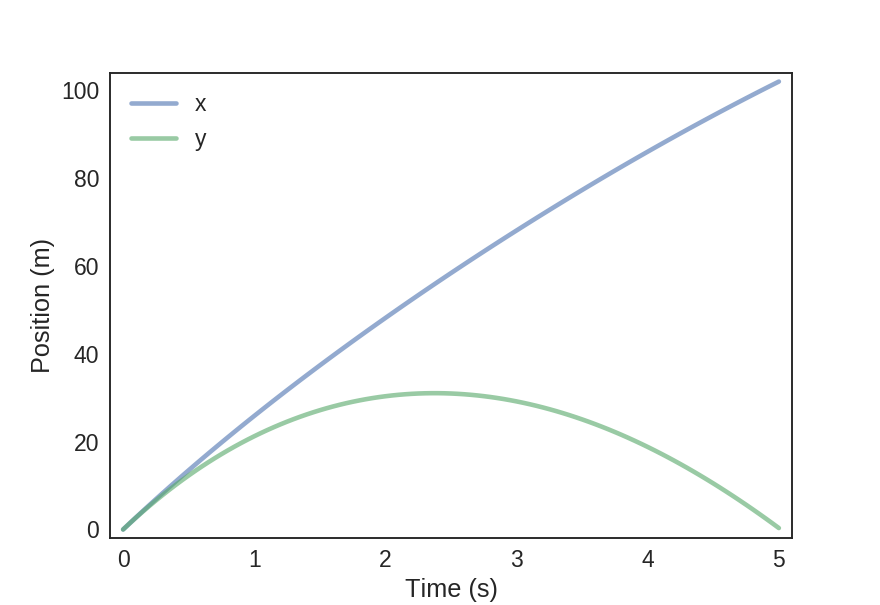

In [14]:
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

<IPython.core.display.Javascript object>


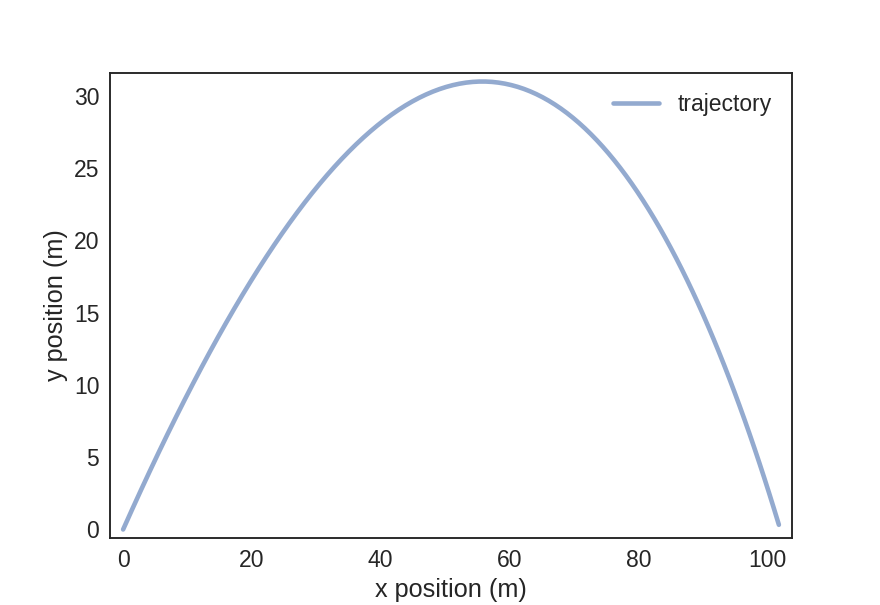

In [15]:
newfig()
plot(xs, ys, label='trajectory')

decorate(xlabel='x position (m)',
         ylabel='y position (m)')

<IPython.core.display.Javascript object>


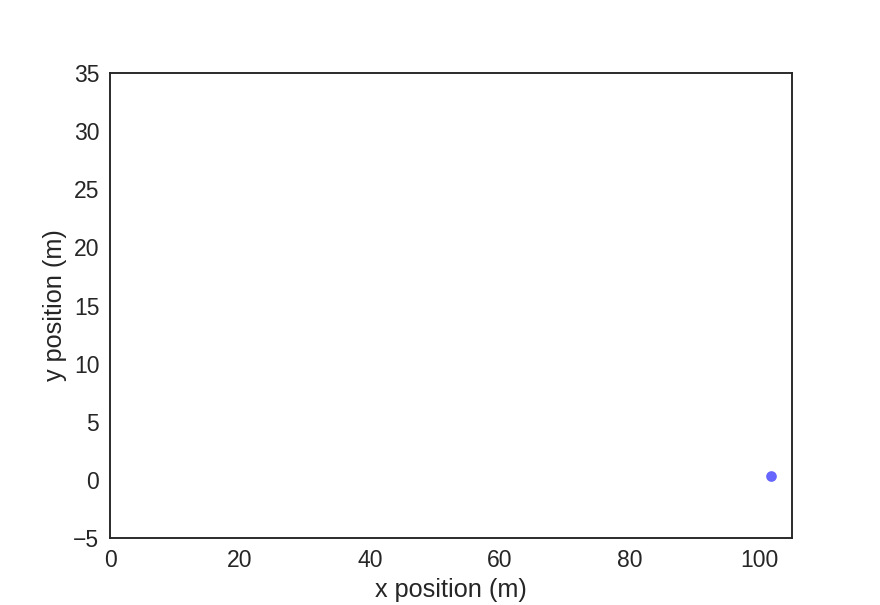

In [34]:
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[0, 105],
         ylim=[-5, 35],
         legend=False)

for x, y in zip(xs, ys):
    plot(x, y, 'bo', update=True)
    sleep(0.01)

In [17]:
def animate2d(xs, ys, speedup=1):
    ts = xs.index
    dts = np.diff(ts)
    dts = np.append(dts, 0)

    newfig()
    decorate(xlabel='x position (m)',
             ylabel='y position (m)',
             xlim=[xs.min(), xs.max()],
             ylim=[ys.min(), ys.max()],
             legend=False)

    for x, y, dt in zip(xs, ys, dts):
        plot(x, y, 'bo', update=True)
        sleep(dt / speedup)

In [18]:
# animate2d(system.results.x, system.results.y)

In [19]:
def final_state(system):
    t_end = system.results.index[-1]
    y, v = system.results.loc[t_end]
    return y*m, v*m/s

In [20]:
def height_func(duration, condition):
    
    condition.set(duration=duration)
    
    system = make_system(condition)
    
    run_odeint(system, slope_func)
    
    t_end = system.results.index[-1]
    y_final = system.results.y[t_end]
    
    return y_final

In [21]:
height_func(5, condition)

0.32434254941087692

In [22]:
%time solution = fsolve(height_func, 5, condition, xtol=1e-2)
solution

CPU times: user 724 ms, sys: 4 ms, total: 728 ms
Wall time: 729 ms


array([ 5.01471188])

In [23]:
condition = Condition(g = 9.8,
                      mass = 145e-3,
                      diameter = 73e-3,
                      rho = 1.2,
                      C_d = 0.3,
                      angle = 45,
                      velocity = 40,
                      duration = 5)

In [24]:
height_func(5, condition)

0.32434254941087692

In [25]:
%time solution = fsolve(height_func, 5, condition, xtol=1e-2)
solution

CPU times: user 508 ms, sys: 4 ms, total: 512 ms
Wall time: 503 ms


array([ 5.01471188])

In [26]:
def final_range(results):
    return results.x.iloc[-1]

In [27]:
condition.set(duration=solution)
    
system = make_system(condition)
    
run_odeint(system, slope_func)
final_range(system.results)

102.05704867480164

In [28]:
def range_func(angle, condition):
    print(angle)
    
    if angle < 0 or angle > 90:
        raise ValueError('Invalid angle: %s' % angle)
    
    condition.set(angle=angle)
    solution = fsolve(height_func, 5, condition, xtol=1e-2)
    
    condition.set(duration=solution)
    system = make_system(condition)
    
    run_odeint(system, slope_func)
    
    x_final = final_range(system.results)
    #print(x_final)
    return -x_final


In [29]:
angle = 40
range_func(angle, condition)

40


-102.62291838669692

In [30]:
condition.set(C_d=0.7)

In [31]:
from scipy.optimize import minimize_scalar

In [32]:
args = (condition,)
options = dict(xatol=1e-3)
res = minimize_scalar(range_func, [10, 80], bounds=[0, 90], args=args, 
                method='bounded', options=options)

34.3769410125
55.6230589875
21.246117975
39.4421633503
38.9376090872
38.8134980982
38.8011366373
38.8014705461
38.8000917516
38.8007375265


In [33]:
res.x

38.801136637275235